In [1]:
%pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ruchi798/data-science-job-salaries")

print("Path to dataset files:", path)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 12.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
/root/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 7.37k/7.37k [00:00<00:00, 7.62MB/s]Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ruchi798/data-science-job-salaries/versions/1



In [2]:
# imports

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline



In [3]:
df = pd.read_csv(path + "/ds_salaries.csv")
df

Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Data Engineer   85000             GBP         109024   
3          Product Data Analyst   20000             USD          20000   
4     Machine Learning Engineer  150000             USD         150000   
..                          ...     ...             ...            ...   
602               Data Engineer  154000             USD         154000   
603               Data Engineer  126000             USD         126000   
604                Data Analyst  129000             USD         129000   
605                Data Analyst  150000             USD         150000   
606                AI Scientist  200000             USD         200000   

    employee_residence  remote_ratio company_location company_size  
0                   DE             0               DE            L  
1                   JP             0               JP            S  
2                   GB            50               GB            M  
3                   HN             0               HN            S  
4                   US            50               US            L  
..                 ...           ...              ...          ...  
602                 US           100               US            M  
603                 US           100               US            M  
604                 US             0               US            M  
605                 US           100               US            M  
606                 IN           100               US            L  

[607 rows x 12 columns]

# Data Science Job Salaries

c

## Collection Process

The creator of the dataset, Ruch Bhatia, compiled the data from publicly available job boards and anonymous submissions to platforms that collect salary data from professionals. It was further aggregated and curated to reflect trends across different years and roles.

### Implications of the Collection Method

- Voluntary Submission Bias - The data relies on voluntary contributions; there is a potential self-selection bias, meaning only individuals willing to share their salaries are represented. This may not accurately reflect the industry average and/or distribution.

- Geographical Bias - Most submissions appear to be from countries with active technology sectors (e.g. United States, Indida), which may limit the generalizability of findings to global trends.

- Limited Verification - There is no confirmation mechanism for the reported figures, which could lead to inaccurate or inflated salaries.

## Structure of the Dataset

- Filename - ds_salaries.csv

- Observations (rows) - 607

- Variables (columns) - 11

- Structure - Each row represents a unique job position or salary entry. Each column represents a specific attribute of that job

## Variable Descriptions

- work_year - The year the salary was reported (e.g., 2020 to 2022).

- experience_level - The level of professional experience: EN - Entry-level, MI - Mid-level, SE - Senior-level, EX - Executive-level

- employment_type - The type of employment contract: FT - Full-time, PT - Part-time, CT - Contract, FL - Freelance

- job_title - The specific title of the data-related job (e.g., Data Scientist, ML Engineer).

- salary - The reported gross annual salary in the original currency.

- salary_currency - The currency code (ISO 4217) of the original salary (e.g., USD, EUR, GBP).

- salary_in_usd - The converted annual salary in USD (standardized for comparison).

- employee_residence - The country where the employee resides.

- remote_ratio - The percentage of remote work: 0 - No remote, 50 - Hybrid, 100 - Fully remote

- company_location - The country where the employer is located.

- company_size - The size of the company: S - Small (<50 employees), M - Medium (50–250), L - Large (>250)

All variables contribute context to the salary data, helping identify trends based on employment settings, geography, and organizational structure.

<hr>

# Data Cleaning

## Inspect the Raw Data

In [4]:
print("Shape →", df.shape)
df.info()
df.describe()
df.nunique()

Shape → (607, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

## Drop Old Index Column

In [5]:
df = df.drop(columns=[c for c in df.columns if c.lower().startswith("unnamed")])

## Standardize Categorical Spellings

In [6]:
df["job_title"] = (
    df["job_title"]
    .str.strip()
    .str.title()
)

exp_map = {
    "EN": "Entry-level/Junior",
    "MI": "Mid-level",
    "SE": "Senior-level",
    "EX": "Executive",
}
df["experience_level"] = df["experience_level"].map(exp_map)

df["employment_type"] = df["employment_type"].map(
    {"FT": "Full-time", "PT": "Part-time", "CT": "Contract", "FL": "Freelance"}
)

df["company_size"] = df["company_size"].map(
    {"S": "Small (<50)", "M": "Medium (50-249)", "L": "Large (250+)"}
)

df["remote_ratio"] = df["remote_ratio"].map(
    {0: "On-site", 50: "Hybrid", 100: "Fully remote"}
)

df["salary_currency"] = df["salary_currency"].str.upper()

## Handle Duplicates

In [7]:
before = len(df)
df = df.drop_duplicates()
print(f"Removed {before - len(df)} exact duplicate rows.")

Removed 42 exact duplicate rows.


## Correct dtypes

In [8]:
df = df.copy()                     

num_cols = ["salary", "salary_in_usd", "work_year"]
for col in num_cols:
    df.loc[:, col] = pd.to_numeric(df[col], errors="coerce")

cat_cols = [
    "experience_level",
    "employment_type",
    "job_title",
    "salary_currency",
    "employee_residence",
    "company_location",
    "company_size",
    "remote_ratio",
]
for col in cat_cols:
    df.loc[:, col] = df[col].astype("category")

## Check for Missing Values in the Variables

In [9]:
missing = df.isna().sum().sort_values(ascending=False)
print(missing[missing > 0])

Series([], dtype: int64)


## Save the Cleaned Dataset

In [10]:
clean_path = f"{path}/ds_salaries_cleaned.csv"
df.to_csv(clean_path, index=False)
print("Cleaned file written to →", clean_path)

Cleaned file written to → /root/.cache/kagglehub/datasets/ruchi798/data-science-job-salaries/versions/1/ds_salaries_cleaned.csv


In [11]:
df

work_year experience_level employment_type                   job_title  \
0         2020        Mid-level       Full-time              Data Scientist   
1         2020     Senior-level       Full-time  Machine Learning Scientist   
2         2020     Senior-level       Full-time           Big Data Engineer   
3         2020        Mid-level       Full-time        Product Data Analyst   
4         2020     Senior-level       Full-time   Machine Learning Engineer   
..         ...              ...             ...                         ...   
602       2022     Senior-level       Full-time               Data Engineer   
603       2022     Senior-level       Full-time               Data Engineer   
604       2022     Senior-level       Full-time                Data Analyst   
605       2022     Senior-level       Full-time                Data Analyst   
606       2022        Mid-level       Full-time                Ai Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0     70000             EUR          79833                 DE       On-site   
1    260000             USD         260000                 JP       On-site   
2     85000             GBP         109024                 GB        Hybrid   
3     20000             USD          20000                 HN       On-site   
4    150000             USD         150000                 US        Hybrid   
..      ...             ...            ...                ...           ...   
602  154000             USD         154000                 US  Fully remote   
603  126000             USD         126000                 US  Fully remote   
604  129000             USD         129000                 US       On-site   
605  150000             USD         150000                 US  Fully remote   
606  200000             USD         200000                 IN  Fully remote   

    company_location     company_size  
0                 DE     Large (250+)  
1                 JP      Small (<50)  
2                 GB  Medium (50-249)  
3                 HN      Small (<50)  
4                 US     Large (250+)  
..               ...              ...  
602               US  Medium (50-249)  
603               US  Medium (50-249)  
604               US  Medium (50-249)  
605               US  Medium (50-249)  
606               US     Large (250+)  

[565 rows x 11 columns]

<hr>

In [39]:
count_per_year = df["work_year"].value_counts().sort_index()
print(count_per_year)



work_year
2020     72
2021    215
2022    278
Name: count, dtype: int64


# Exploratory Data Analysis

To gain a good understanding of our Data Science Job Salaries Dataset, this part of the notebook will explore the different information contained, as factors related to salary. The results from this analysis will be used to decide what kind of research question we can ask and try to answer through Data Modeling techniques.

## EDA Question 1: How does experience level impact salary in USD?

To observe the relationship between these two variables, we can group our df by experience_level and describe the dataset based on salary_in_usd.

In [13]:
group_df = df.groupby("experience_level").describe()["salary_in_usd"]
group_df

count           mean            std      min        25%  \
experience_level                                                              
Entry-level/Junior   88.0   61643.318182   44395.541126   4000.0   27505.00   
Executive            26.0  199392.038462  117071.255697  69741.0  130006.50   
Mid-level           208.0   87792.995192   64118.971174   2859.0   47163.75   
Senior-level        243.0  138374.880658   59955.965011  18907.0   99531.50   

                         50%        75%       max  
experience_level                                   
Entry-level/Junior   56500.0   85425.75  250000.0  
Executive           171437.5  233750.00  600000.0  
Mid-level            76940.0  112075.00  450000.0  
Senior-level        135000.0  171881.00  412000.0

In [14]:
group_df["IQR"] = group_df["75%"] - group_df["25%"]
group_df["variance"] = group_df["std"] ** 2

group_df

count           mean            std      min        25%  \
experience_level                                                              
Entry-level/Junior   88.0   61643.318182   44395.541126   4000.0   27505.00   
Executive            26.0  199392.038462  117071.255697  69741.0  130006.50   
Mid-level           208.0   87792.995192   64118.971174   2859.0   47163.75   
Senior-level        243.0  138374.880658   59955.965011  18907.0   99531.50   

                         50%        75%       max        IQR      variance  
experience_level                                                            
Entry-level/Junior   56500.0   85425.75  250000.0   57920.75  1.970964e+09  
Executive           171437.5  233750.00  600000.0  103743.50  1.370568e+10  
Mid-level            76940.0  112075.00  450000.0   64911.25  4.111242e+09  
Senior-level        135000.0  171881.00  412000.0   72349.50  3.594718e+09

### Question 1 Visualizations

To further observe these values, we can generate boxplots and bar charts showing the differences in salary_in_usd based on experience_level

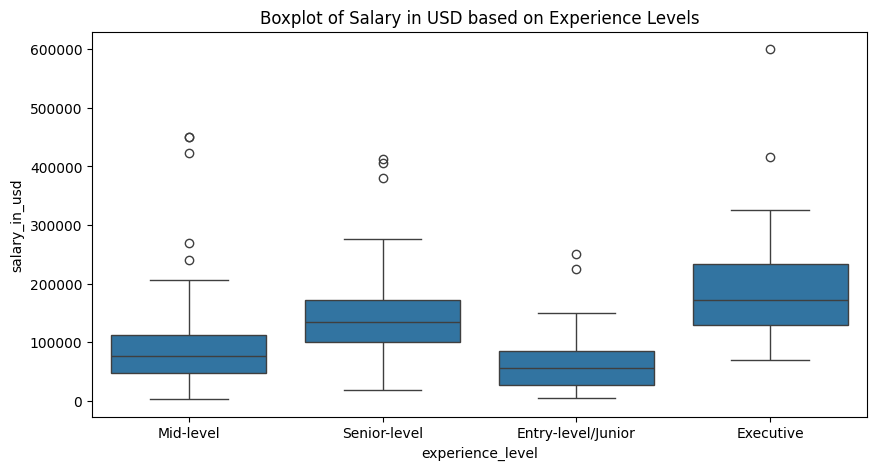

In [15]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="experience_level", y="salary_in_usd")
plt.title("Boxplot of Salary in USD based on Experience Levels")
plt.xlabel("experience_level")
plt.ylabel("salary_in_usd")
plt.show()

The plot provided displays the distribution of salaries for each experience level. It represents the interquartile range (middle 50% of the data), the line inside shows the median, and the dots outside the whiskers are the outliers. The plot allows us to draw the following conclusions:

- Salary increases with experience, with executive roles exhibiting the highest median salary and the widest spread, followed by senior, mid-level, and entry-level positions.

- Wider spread for executives & seniors indicates greater variability in their pay; some earn very high salaries, but there's a broad range. 

- Entry-level roles have the lowest and most compact salary range, showing limited variation and lower pay overall.

/tmp/ipykernel_92/4270740201.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, group_df["mean"][i], f"${group_df['mean'][i]:.2f}", ha="center", va="bottom")


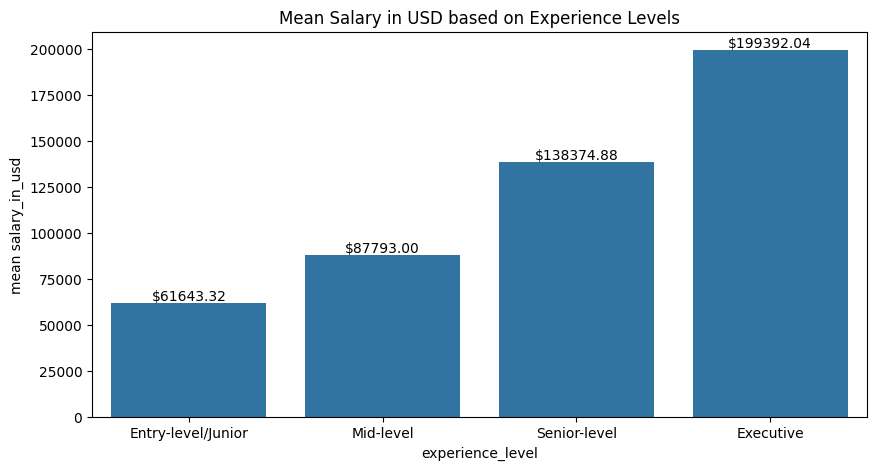

In [16]:
fig = plt.figure(figsize=(10, 5))
# sort experience level based on superiority
group_df = group_df.sort_values("mean", ascending=True)

sns.barplot(data=group_df.reset_index(), x="experience_level", y="mean")

plt.title("Mean Salary in USD based on Experience Levels")
plt.xlabel("experience_level")
plt.ylabel("mean salary_in_usd")
for i in range(len(group_df)):
    plt.text(i, group_df["mean"][i], f"${group_df['mean'][i]:.2f}", ha="center", va="bottom")
plt.show()

The bar chart presents the average salary for each experience level, with the exact dollar value shown above each bar. The following are depicted in the graph:

Upward trend: As seniority increases, so does the average salary:

- Entry-level: ~$61,643

- Mid-level: ~$87,793

- Senior-level: ~$138,375

- Executive: ~$199,392

This shows a positive correlation between experience and salary, those at higher levels earn significantly more.

<hr>

## EDA Question 2: Do remote jobs get paid higher than on-site jobs?

In [17]:
group_df = df.groupby("remote_ratio").describe()["salary_in_usd"]
group_df

count           mean           std     min      25%       50%  \
remote_ratio                                                                  
Fully remote  346.0  120763.190751  74930.425808  4000.0  70000.0  110712.5   
Hybrid         98.0   80721.897959  57639.096695  5409.0  50000.5   68010.5   
On-site       121.0  105785.404959  68392.500340  2859.0  62000.0   98158.0   

                    75%       max  
remote_ratio                       
Fully remote  159750.00  600000.0  
Hybrid         99925.75  423000.0  
On-site       136000.00  450000.0

In [18]:

group_df["IQR"] = group_df["75%"] - group_df["25%"]
group_df["variance"] = group_df["std"] ** 2

group_df

count           mean           std     min      25%       50%  \
remote_ratio                                                                  
Fully remote  346.0  120763.190751  74930.425808  4000.0  70000.0  110712.5   
Hybrid         98.0   80721.897959  57639.096695  5409.0  50000.5   68010.5   
On-site       121.0  105785.404959  68392.500340  2859.0  62000.0   98158.0   

                    75%       max       IQR      variance  
remote_ratio                                               
Fully remote  159750.00  600000.0  89750.00  5.614569e+09  
Hybrid         99925.75  423000.0  49925.25  3.322265e+09  
On-site       136000.00  450000.0  74000.00  4.677534e+09

### Question 2 Visualizations

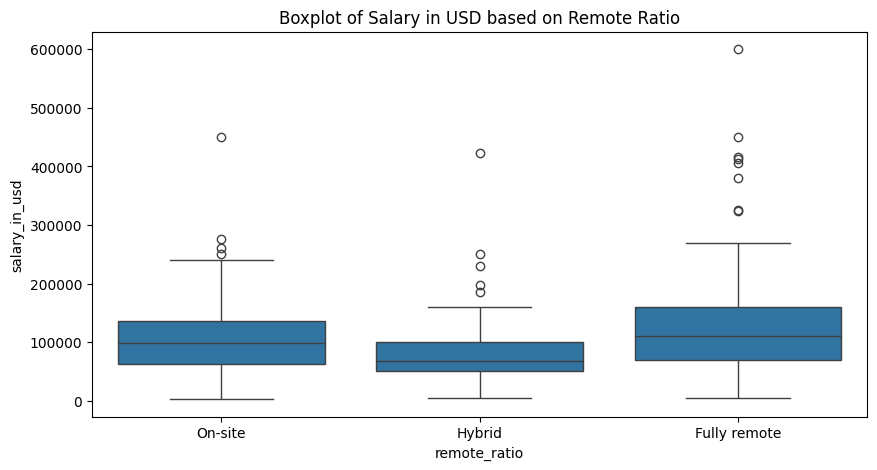

In [19]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="remote_ratio", y="salary_in_usd")
plt.title("Boxplot of Salary in USD based on Remote Ratio")
plt.xlabel("remote_ratio")
plt.ylabel("salary_in_usd")
plt.show()

The plot compares salary distribution across on-site, hybrid, and fully remote jobs. From this, it is depicted that fully remote jobs have:

- a higher median salary

- a wider interquartile range (IQR)

- more high-end outliers, including the dataset's highest salary of $600,000

This means that fully remote jobs tend to offer higher and more variable salaries than hybrid and on-site positions. On-site positions, on the other hand, have tighter salary ranges and lower upper limits. While hybrid roles show more compact distributions, it's possibly due to more standardized pay scales.

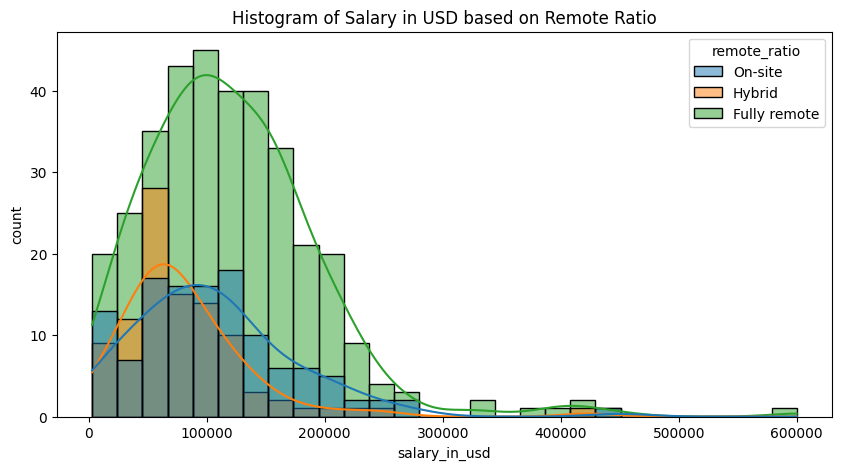

In [20]:
fig = plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="salary_in_usd", hue="remote_ratio", kde=True)
plt.title("Histogram of Salary in USD based on Remote Ratio")
plt.xlabel("salary_in_usd")
plt.ylabel("count")
plt.show()

The plot reveals how salary frequencies are distributed for each work setup. The green curve (fully remote) shifts right, meaning:

- higher salaries are more common among remote workers.

- there is a noticeable peak around $100,000–150,000.

On-site and hybrid roles peak lower on the scale, with most salaries falling below $125,000. From that, it is gathered that remote work is associated with higher salary ranges, even though it's not the most common type. Moreover, these jobs tend to dominate the upper ends of the salary spectrum, even after accounting for a few extreme outliers.

In [21]:
# find the outlier
df[df["remote_ratio"] == "Fully remote"].describe()

work_year        salary  salary_in_usd
count   346.000000  3.460000e+02     346.000000
mean   2021.456647  2.717219e+05  120763.190751
std       0.676414  1.663897e+06   74930.425808
min    2020.000000  4.000000e+03    4000.000000
25%    2021.000000  8.000000e+04   70000.000000
50%    2022.000000  1.200800e+05  110712.500000
75%    2022.000000  1.676562e+05  159750.000000
max    2022.000000  3.040000e+07  600000.000000

In [22]:
# outlier
df[df["salary_in_usd"] == df["salary_in_usd"].max()]

work_year experience_level employment_type                job_title  \
252       2021        Executive       Full-time  Principal Data Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
252  600000             USD         600000                 US  Fully remote   

    company_location  company_size  
252               US  Large (250+)

This is the single highest salary found in the dataset. The outlier in question belongs to:

- Job Title: Principal Data Engineer

- Experience Level: Executive

- Employment Type: Full-time

- Remote Ratio: Fully remote

- Company Size: Large (250+ employees)

- Location: US (employee & employer)

- Year: 2021

For an executive-level technical role in the U.S. tech industry, especially at a large company, a $600k package isn't unrealistic, particularly if bonuses, stock options, or a top-tier firm are taken into account. This data point is valid but exceptional; it doesn't invalidate trends but does skew averages upward for fully remote roles. It emphasizes that op remote roles can command elite-level salaries, especially in the U.S

<hr>

## EDA Question 3: Is there a difference in salary based on company location and employee residence?

In [23]:

group_df = df.groupby("employee_residence").describe()["salary_in_usd"]
group_df

group_df["IQR"] = group_df["75%"] - group_df["25%"]
group_df["variance"] = group_df["std"] ** 2

group_df

count           mean           std       min        25%  \
employee_residence                                                            
AE                    3.0  100000.000000  30413.812651   65000.0   90000.00   
AR                    1.0   60000.000000           NaN   60000.0   60000.00   
AT                    3.0   76738.666667  13386.018539   64849.0   69489.50   
AU                    3.0  108042.666667  36337.909768   86703.0   87064.00   
BE                    2.0   85699.000000   4179.001077   82744.0   84221.50   
BG                    1.0   80000.000000           NaN   80000.0   80000.00   
BO                    1.0   75000.000000           NaN   75000.0   75000.00   
BR                    6.0   54634.666667  61537.353923   12000.0   14402.50   
CA                   27.0   97191.629630  40151.787886   52000.0   71349.00   
CH                    1.0  122346.000000           NaN  122346.0  122346.00   
CL                    1.0   40038.000000           NaN   40038.0   40038.00   
CN                    1.0   43331.000000           NaN   43331.0   43331.00   
CO                    1.0   21844.000000           NaN   21844.0   21844.00   
CZ                    1.0   69999.000000           NaN   69999.0   69999.00   
DE                   24.0   85336.666667  40215.644681   15966.0   62411.25   
DK                    2.0   37252.500000  12223.754926   28609.0   32930.75   
DZ                    1.0  100000.000000           NaN  100000.0  100000.00   
EE                    1.0   32974.000000           NaN   32974.0   32974.00   
ES                   15.0   57593.400000  28395.033942   10354.0   41371.00   
FR                   18.0   59886.611111  15848.687706   36643.0   49734.50   
GB                   43.0   81470.069767  30283.754781   37300.0   55247.00   
GR                   12.0   56445.750000  21544.768469   20000.0   43021.75   
HK                    1.0   66022.000000           NaN   66022.0   66022.00   
HN                    1.0   20000.000000           NaN   20000.0   20000.00   
HR                    1.0   45618.000000           NaN   45618.0   45618.00   
HU                    2.0   35997.000000    370.523953   35735.0   35866.00   
IE                    1.0   71444.000000           NaN   71444.0   71444.00   
IN                   30.0   37322.333333  43741.188224    5409.0   16397.00   
IQ                    1.0  100000.000000           NaN  100000.0  100000.00   
IR                    1.0    4000.000000           NaN    4000.0    4000.00   
IT                    4.0   61600.000000  63014.243221   20000.0   21251.75   
JE                    1.0  100000.000000           NaN  100000.0  100000.00   
JP                    7.0  103537.714286  81283.295518   40000.0   52700.00   
KE                    1.0    9272.000000           NaN    9272.0    9272.00   
LU                    1.0   59102.000000           NaN   59102.0   59102.00   
MD                    1.0   18000.000000           NaN   18000.0   18000.00   
MT                    1.0   28369.000000           NaN   28369.0   28369.00   
MX                    2.0   18185.000000  21674.237057    2859.0   10522.00   
MY                    1.0  200000.000000           NaN  200000.0  200000.00   
NG                    2.0   30000.000000  28284.271247   10000.0   20000.00   
NL                    5.0   60956.600000  17746.565479   42000.0   45391.00   
NZ                    1.0  125000.000000           NaN  125000.0  125000.00   
PH                    1.0   45760.000000           NaN   45760.0   45760.00   
PK                    6.0   27462.833333  22766.222791    8000.0   12000.00   
PL                    4.0   56177.500000  39293.270285   28476.0   33811.50   
PR                    1.0  160000.000000           NaN  160000.0  160000.00   
PT                    6.0   42862.500000  21443.783834   10000.0   29032.25   
RO                    2.0   51419.000000  35940.823474   26005.0   38712.00   
RS                    1.0   25532.000000           NaN   25532.0   255

### Question 3 Visualizations

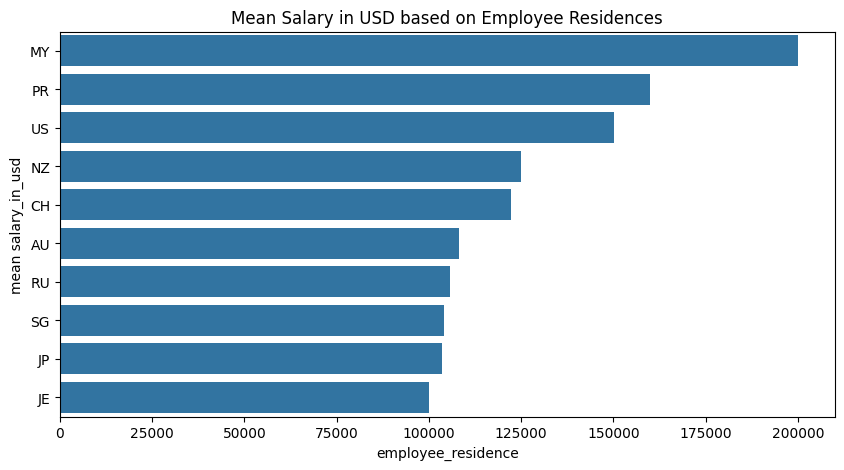

In [24]:
group_df_top10 = group_df.sort_values("mean", ascending=False).head(10)


fig = plt.figure(figsize=(10, 5))
sns.barplot(data=group_df_top10.reset_index(), x="mean", y="employee_residence", orient="h")

plt.title("Mean Salary in USD based on Employee Residences")
plt.xlabel("employee_residence")
plt.ylabel("mean salary_in_usd")
plt.show()

The plot shows the top ten countries (by ISO country codes) where employees reside, ranked by average salary in USD. MY (Malaysia) and PR (Puerto Rico) top the list, which could be due to low sample sizes or high-paying roles skewing the average. US-based workers are in the top three, consistent with expectations given the mature tech job market. Other high-paying locations include New Zealand (NZ), Switzerland (CH), Australia (AU), and Singapore (SG). This illustrates the following points:

- Where employees live does influence salary, possibly due to cost-of-living adjustments, labor market conditions, or access to global/remote opportunities. 

- Outliers or small sample sizes may distort the true average and should be validated further.

In [25]:
# top 10 company location based on salary

group_df = df.groupby("company_location").describe()["salary_in_usd"]

group_df["IQR"] = group_df["75%"] - group_df["25%"]
group_df["variance"] = group_df["std"] ** 2

group_df_top10 = group_df.sort_values("mean", ascending=False).head(10)


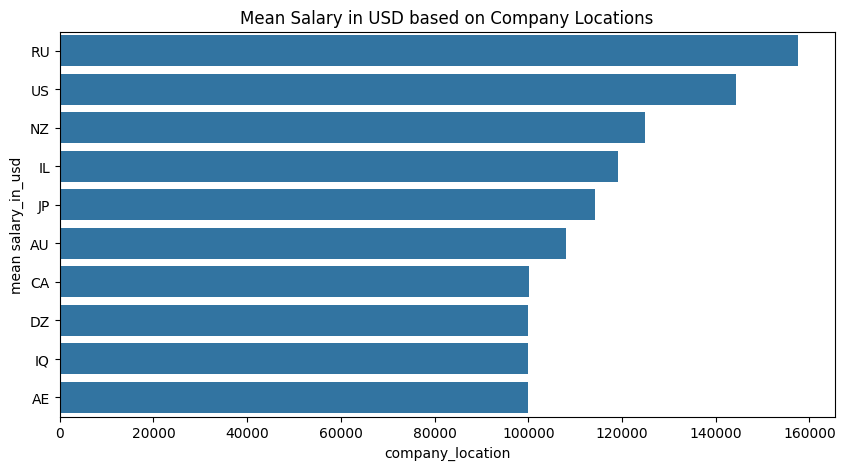

In [26]:
fig = plt.figure(figsize=(10, 5))
sns.barplot(data=group_df_top10.reset_index(), x="mean", y="company_location", orient="h")

plt.title("Mean Salary in USD based on Company Locations")
plt.xlabel("company_location")
plt.ylabel("mean salary_in_usd")
plt.show()

The plot ranks the top ten countries based on the mean salary paid by companies located there. Russia (RU) and the United States (US) top the list of highest-paying company locations. Other countries like New Zealand (NZ), Israel (IL), Japan (JP), and Australia (AU) also appear prominently. The inclusion of countries such as Iraq (IQ), Algeria (DZ), and the UAE (AE) may indicate the presence of individual high-paying entries or small sample biases. This shows that the location of the employer significantly impacts pay, which is likely due to:

- Economic strength

- Industry maturity

- Regional salary benchmarks

Countries known for strong tech or finance sectors (e.g. US, IL, JP) consistently appear among the top paying.

In [27]:
%pip install pycountry plotly

import pandas as pd
import pycountry
import plotly.express as px

# Group by Company Location
avg_by_company_location = df.groupby("company_location")["salary_in_usd"].mean().reset_index()
avg_by_company_location.columns = ["country_code", "average_salary"]

# Converting to 3-letter (ISO-ALPHA-3)
def alpha2_to_alpha3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

avg_by_company_location["country_3"] = avg_by_company_location["country_code"].apply(alpha2_to_alpha3)

# Drop unknown country codes
avg_by_company_location = avg_by_company_location.dropna(subset=["country_3"])

# Map
fig = px.choropleth(
    avg_by_company_location,
    locations="country_3",
    color="average_salary",
    color_continuous_scale="Viridis",
    title="Average Salary by Company Location",
    labels={'average_salary': 'Average Salary (USD)'},
    locationmode="ISO-3"
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type="natural earth"),
    title_x=0.5,
    margin=dict(l=0, r=0, t=30, b=0)
)

fig.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 147.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


The choropleth map shows how average salaries vary across countries, allowing for quick comparisons of global data trends. It clearly highlights regional patterns and outliers, making it easy to pinpoint areas with higher or lower compensation levels and understand the global distribution of data-related roles.

1. **Top-Tier Salary Countries**
    * High Earning Regions: Russia, the United States, New Zealand, Israel, and Japan dominate the top positions, with average salaries well above the global median, reflecting strong data science markets and higher cost of living environments.
    * Consistently Strong Performers: Australia, Canada, and the Middle Eastern nations (Algeria, Iraq, United Arab Emirates) also boast averages nearing or exceeding the 100,000 USD mark, making them attractive for data talent.

2. **Middle Range Salary Countries**
    * European nations such as Belgium, United Kingdom, Germany, Austria, Switzerland, and France maintain salaries in the range of roughly 60,000–90,000 USD, aligning with robust economic and technological ecosystems across the EU.

3. **Developing and Lower Salary Regions**
    * Countries like Malaysia, Mexico, Nigeria, India, Colombia, Turkey, Honduras, Brazil, and Kenya fall into a lower range, averaging roughly 9,000–40,000 USD, indicative of differing economic realities and cost of living across these markets.

4. **Outliers and Extremes**
    * Certain markets, such as Russia and USA, stand out with salaries roughly double or triple those in other nations, highlighting their role as global hubs for data-related roles.

<hr>

### EDA Question 4: How do `experience_level`, and `company_size` collectively influence salary in USD?

To observe how `experience_level`, and `company_size` collectively influence `salary_in_usd`, we can group our DataFrame by these two categorical variables and then calculate measures of central tendency and dispersion for `salary_in_usd`.

In [28]:
agg_stats = df.copy()
agg_stats = agg_stats.groupby(by=["experience_level", "company_size"]).agg(
    mean_salary_in_usd=("salary_in_usd", "mean"),
    median_salary_in_usd=("salary_in_usd", "median"),
    std_salary_in_usd=("salary_in_usd", "std"),
    count=("salary_in_usd", "count")
).reset_index()

In [29]:
agg_stats.sort_values(by=["mean_salary_in_usd"], ascending=[False], inplace=True)
agg_stats

experience_level     company_size  mean_salary_in_usd  \
3            Executive     Large (250+)       221942.181818   
5            Executive      Small (<50)       201309.333333   
4            Executive  Medium (50-249)       178241.750000   
9         Senior-level     Large (250+)       146702.217391   
10        Senior-level  Medium (50-249)       137829.309211   
11        Senior-level      Small (<50)       116026.727273   
6            Mid-level     Large (250+)        96903.309524   
7            Mid-level  Medium (50-249)        90577.531250   
0   Entry-level/Junior     Large (250+)        72813.241379   
2   Entry-level/Junior      Small (<50)        62185.310345   
8            Mid-level      Small (<50)        50915.071429   
1   Entry-level/Junior  Medium (50-249)        50321.800000   

    median_salary_in_usd  std_salary_in_usd  count  
3               196979.0      145623.960832     11  
5               118187.0      187498.841315      3  
4               171437.5       66942.525541     12  
9               144000.0       79614.503429     69  
10              136300.0       47614.562639    152  
11              108603.5       62009.585655     22  
6                83764.0       73262.977364     84  
7                80845.5       59162.870735     96  
0                63831.0       54824.561015     29  
2                60000.0       40693.000927     29  
8                52369.0       31744.784977     28  
1                49823.0       33975.409445     30

### Question 4 Visualizations

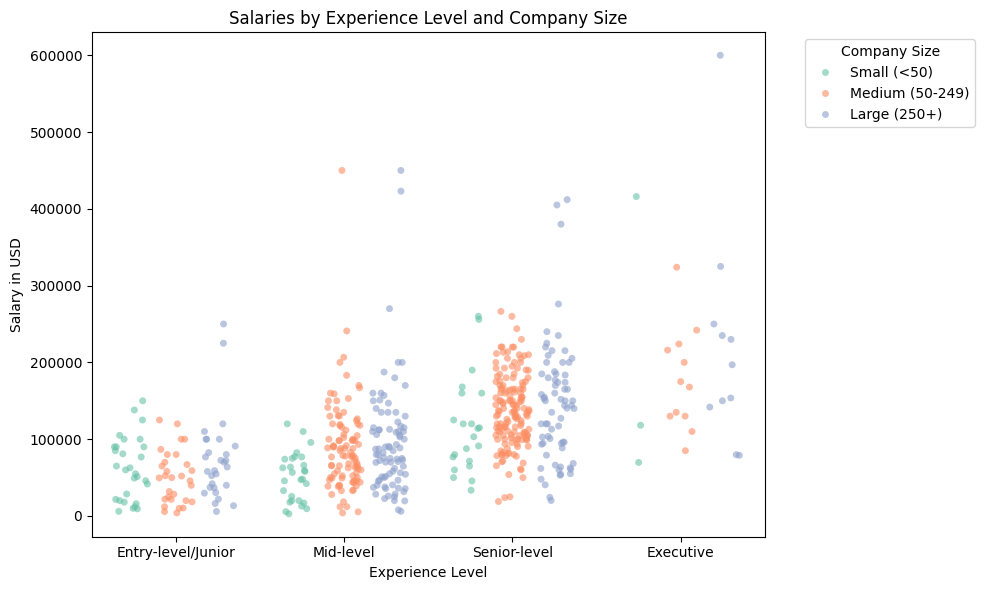

In [30]:
df_plot = df.copy()

experience_level_order = ['Entry-level/Junior', 'Mid-level', 'Senior-level', 'Executive']
company_size_order = ['Small (<50)', 'Medium (50-249)', 'Large (250+)']

df_plot['experience_level'] = pd.Categorical(df_plot['experience_level'], categories=experience_level_order, ordered=True)
df_plot['company_size'] = pd.Categorical(df_plot['company_size'], categories=company_size_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df_plot,
    x='experience_level',
    y='salary_in_usd',
    hue='company_size',
    jitter=0.3,      
    dodge=True,     
    alpha=0.6,        
    palette='Set2'
)
plt.title("Salaries by Experience Level and Company Size")
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")
plt.legend(title="Company Size", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This plot allows us to make some key observations across all four experience levels and three company size categories

1. **Entry Level/Junior**
    * Salaries are generally lower, with data points being dense monstly around 50,000
    * No single company size category dominates the salary distribution at this experience level
    * There are some outliers from large companies, offering salaries between 200,000 to 300,000

2. **Mid-level**
    * Salaries in the mid-level experience level now show a wider spread, althought it is more dense just below the 100,000 mark, most of it still being under the 100,000 - 120,000 mark
    * Medium and Large sized companies appear to offer more salaries to mid-level experience employees rather than Small sized companies
    * It seems there is a datapoint from a Medium sized company and 2 datapoints from Large sized companies that offer high salaries around the 400,000 - 450,000 mark

3. **Senior-level**
    * Salaries are higher, with it being more dense in the 100,000-200,000 range
    * Medium companies seem to hire more employees with Senior-level experience than other sized companies

4. **Executive**
    * It seems that the number of data points for employees with this experience level is quite sparse
    * There are clear outliers, especially a point from a Large company nearing 600,000, and another from a Small company above 400,000, and one from a Medium company above 300,000. These indicate that executive salaries can be highly variable  and influenced by factors beyond just company size or even typical experience-level progression

>**Low Outliers**: Interestingly, there are some data points, particularly at senior and executive levels, that appear relatively low compared to others at the same experience level. This could indicate a wide range of roles within each "level" (which may be seen in `job_title`) or other influencing factors.

<hr>

## EDA Question 5: How does the work_year impact the average salary in USD?

To understand how salaries evolve across the years, we can group the dataset by work_year  and compute summary statistics for salary_in_usd. This will give us an overview of central tendencies and dispersion across different years.

In [31]:
yearly_stats = df.groupby("work_year").describe()["salary_in_usd"]

yearly_stats["IQR"] = yearly_stats["75%"] - yearly_stats["25%"]
yearly_stats["variance"] = yearly_stats["std"] ** 2
yearly_stats

count           mean           std      min      25%       50%  \
work_year                                                                   
2020        72.0   95813.000000  82831.799222   5707.0  45724.5   75544.0   
2021       215.0   99430.413953  80304.317444   2859.0  50000.0   82528.0   
2022       278.0  123089.097122  59888.932893  10000.0  78791.0  120000.0   

                75%       max      IQR      variance  
work_year                                             
2020       115526.0  450000.0  69801.5  6.861107e+09  
2021       135000.0  600000.0  85000.0  6.448783e+09  
2022       160000.0  405000.0  81209.0  3.586684e+09

### Question 5 Visualizations

To clearly observe how salaries evolve across years, we can generate both line charts and boxplots.

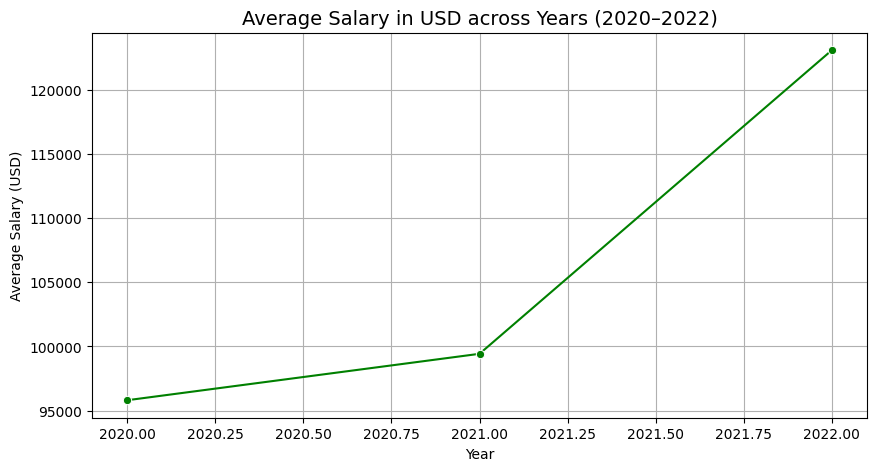

In [32]:
avg_salary_by_year = df.groupby("work_year")["salary_in_usd"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=avg_salary_by_year, x="work_year", y="salary_in_usd", marker="o", color="green")
plt.title("Average Salary in USD across Years (2020–2022)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.grid(True)
plt.show()

The plot illustrates the trend in average salaries over three years (2020–2022), highlighting a gradual rise from roughly $95,800 in 2020 to approximately $123,100 in 2022. This shift suggests that while salaries remained relatively stable during the pandemic, the post‑pandemic recovery and growing demand for data-related roles led to a significant rise in average compensation. Some further insights derived from the plot include:

* **Consistent Growth Pattern**
    * The average salary increased steadily from roughly USD 95,800 in 2020 to roughly USD 99,430 in 2021, followed by a significant jump to roughly USD 123,089 in 2022.

* **Possible Impacts of the Pandemic**
    * The relatively lower salaries in 2020 align with the height of the pandemic, when economic uncertainty and hiring freezes were prevalent across many industries, including tech and data roles.

* **Post‑Pandemic Recovery and Surge**
    * By 2022, as businesses adapted to remote and digital-first strategies, demand for data professionals surged. This shift is reflected in the noticeable rise in average salaries, suggesting a stronger market and higher compensation to attract critical talent.


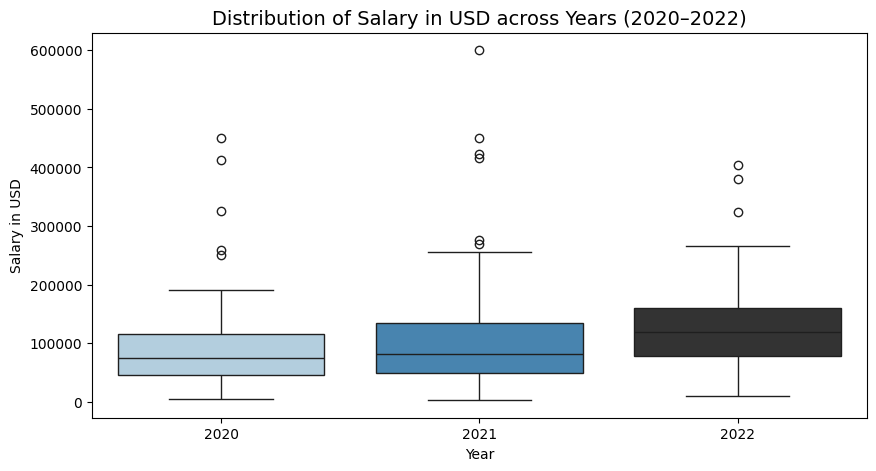

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="work_year", y="salary_in_usd", 
            hue="work_year",  # uses work_year for color assignment
            dodge=False,     
            palette="Blues_d", 
            legend=False)     
plt.title("Distribution of Salary in USD across Years (2020–2022)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Salary in USD")
plt.show()


The box plot compares the distribution of salaries across three years (2020–2022), showing a noticeable upward shift in central tendency and range over time. Median salaries rise from roughly $75,500 in 2020 to $120,000 in 2022, highlighting a significant increase in typical pay as the data field evolved post‑pandemic.

* **Rising Central Tendency**
    * The median salary increased sharply from approximately 75,544 in 2020 to 120,000 in 2022, indicating that typical salaries grew significantly as market conditions recovered post‑pandemic.

* **Increasing Variability**
    * The Interquartile Range (IQR), which captures the middle 50% of salaries, grew from roughly 69,800 in 2020 to roughly 81,209 in 2022. This suggests that salary distribution became more dispersed over time, highlighting a broader range of roles and compensation packages

* **Higher Extremes and Outliers**
    * The maximum salary rose from 450,000 in 2020 to 600,000 in 2021 and 405,000 in 2022, suggesting the presence of high‑earning outliers, especially in the post‑pandemic period when demand for senior roles surged.

* **Decline in Variance**
    * Variance dropped from roughly 6.86 billion in 2020 to 3.59 billion in 2022, implying that despite the higher salaries and wider IQR, salaries became relatively more clustered as the market matured and standardized for certain roles and experience levels.

<hr>

# Research Question

## For distinct categories of data-related roles (Data Science/ML, Data Engineering/Architecture, Data Analytics/BI, and Data Leadership/Management), does the relationship between experience_level and salary significantly vary based on company_size,  remote_ratio (on-site, hybrid, or fully remote), and whether the company_location is in an established tech hub versus other regions?

>**Connection of the Research Question to EDA Findings**:
>>This research question is directly driven by EDA findings showing non-uniform salary distributions across experience levels and clear variations when considering company size and location. Additionally, our analysis explicitly highlighted that fully remote roles tend to have higher and more variable salaries, making `remote_ratio` a critical factor to include in understanding these complex relationships.

>**Importance and Significance of the Research Question**: 
>>This research question is highly important as it provides data professionals with granular insights into how their job category, experience, company attributes, and work arrangement combine to influence earning potential. Its significance lies in enabling both individuals to make highly informed career decisions and organizations to craft more competitive and effective compensation strategies in the dynamic global data talent market.

In [34]:
def categorize_job_title(job_title):

    ds_keywords = [
        'data scientist', 'research scientist', 'applied data scientist',
        'staff data scientist', 'data science consultant'
    ]

    ml_keywords = [
        'machine learning engineer', 'ai scientist', 'machine learning scientist',
        'applied machine learning scientist', 'machine learning developer',
        'data science engineer', 
        'computer vision engineer', 'ml engineer', 'computer vision software engineer',
        'nlp engineer', 'lead machine learning engineer',
        '3d computer vision researcher', 'machine learning manager', 
        'machine learning infrastructure engineer' 
    ]

    de_arch_keywords = [
        'data engineer', 'big data engineer', 'data architect', 'lead data engineer',
        'cloud data engineer', 'etl developer', 'big data architect'
    ]

    da_keywords = [
        'data analyst', 'bi data analyst', 'business data analyst',
        'data analytics engineer', 'analytics engineer', 'lead data analyst',
        'product data analyst', 'financial data analyst',
        'marketing data analyst', 'data specialist', 'finance data analyst',
        'data analytics lead', 'data analytics manager'
    ]

    leadership_management_keywords = [
        'data science manager', 'director of data science', 'head of data',
        'data engineering manager', 'head of data science',
        'director of data engineering', 'machine learning manager',
        'head of machine learning', 'principal data scientist', 'principal data engineer',
        'principal data analyst'
    ]

    if any(keyword in job_title for keyword in ds_keywords):
        return "Data Science"
    elif any(keyword in job_title for keyword in ml_keywords):
        return "Machine Learning / AI"
    elif any(keyword in job_title for keyword in de_arch_keywords):
        return "Data Engineering / Architecture"
    elif any(keyword in job_title for keyword in da_keywords):
        return "Data Analytics / Business Intelligence"
    elif any(keyword in job_title for keyword in leadership_management_keywords):
        return "Leadership / Management"
    else:
        return "Other"

In [35]:
rq_df = df.copy()
rq_df['job_title'] = rq_df['job_title'].str.lower()
rq_df['job_category'] = rq_df['job_title'].apply(categorize_job_title)

rq_df

work_year experience_level employment_type                   job_title  \
0         2020        Mid-level       Full-time              data scientist   
1         2020     Senior-level       Full-time  machine learning scientist   
2         2020     Senior-level       Full-time           big data engineer   
3         2020        Mid-level       Full-time        product data analyst   
4         2020     Senior-level       Full-time   machine learning engineer   
..         ...              ...             ...                         ...   
602       2022     Senior-level       Full-time               data engineer   
603       2022     Senior-level       Full-time               data engineer   
604       2022     Senior-level       Full-time                data analyst   
605       2022     Senior-level       Full-time                data analyst   
606       2022        Mid-level       Full-time                ai scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0     70000             EUR          79833                 DE       On-site   
1    260000             USD         260000                 JP       On-site   
2     85000             GBP         109024                 GB        Hybrid   
3     20000             USD          20000                 HN       On-site   
4    150000             USD         150000                 US        Hybrid   
..      ...             ...            ...                ...           ...   
602  154000             USD         154000                 US  Fully remote   
603  126000             USD         126000                 US  Fully remote   
604  129000             USD         129000                 US       On-site   
605  150000             USD         150000                 US  Fully remote   
606  200000             USD         200000                 IN  Fully remote   

    company_location     company_size                            job_category  
0                 DE     Large (250+)                            Data Science  
1                 JP      Small (<50)                   Machine Learning / AI  
2                 GB  Medium (50-249)         Data Engineering / Architecture  
3                 HN      Small (<50)  Data Analytics / Business Intelligence  
4                 US     Large (250+)                   Machine Learning / AI  
..               ...              ...                                     ...  
602               US  Medium (50-249)         Data Engineering / Architecture  
603               US  Medium (50-249)         Data Engineering / Architecture  
604               US  Medium (50-249)  Data Analytics / Business Intelligence  
605               US  Medium (50-249)  Data Analytics / Business Intelligence  
606               US     Large (250+)                   Machine Learning / AI  

[565 rows x 12 columns]

In [36]:
df.work_year.value_counts()

work_year
2022    278
2021    215
2020     72
Name: count, dtype: int64